In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glove_routines import *
from text_classifier import *
%load_ext autoreload
%autoreload 2

In [10]:
from ploter import *
from glove_routines import *

def create_results():
    embedding_dim = [5, 30, 50]
    eta = [0.01]
    alpha = [1]
    nmax = [400, 600, 800, 12000]
    epochs = [1]
    costs = []
    for emb in embedding_dim:
        for e in eta:
            for a in alpha:
                for nm in nmax:
                    for ep in epochs:
                        flag = str("_emb"+str(emb)+"_eta"+str(e)+"_alpha"+str(a)+"_nmax"+str(nm)+"_epochs"+str(ep))
                        print("doing :",flag)
                        cost = glove_SGD(embedding_dim=emb, eta=e, alpha=a, nmax=nm, epochs=ep,flags=flag, track_losses=0)
                        print("DONE :",flag)
                        costs.append(cost)
                        
def update_cost(cost, fn, x, w, z, newW, newZ, debug=False):
    if(debug):
        print(cost)
        print(fn)
        print(x)
        print(w)
        print(z)
        print(newW)
        print(newZ)
    cost = cost - 1/2 * fn* pow(x - np.dot(w,z),2)
    if(debug):
        print(cost)
    cost = cost + 1/2 * fn* pow(x - np.dot(newW, newZ),2)
    if(debug):
        print(cost)
    return cost

import math
def glove_SGD(embedding_dim = 20, eta = 0.001, alpha = 3 / 4, nmax = 100, epochs = 10, track_losses = -1, flags=""):
    '''
    Create the embeddings.npy (and the embeddings_cost.npy) needed to perform logistic regression later.
    Params :
        embedding_dim is the size of the vectors associated to each word
        eta is the learning rate
        alpha is the power used in the weight function f which gives importance to each entry. alpha must be between 0 and 1.
        nmax is the diviser used in the weight function f.
        epochs is the number of time the SGD will be perform.
        track_losses must be >0 if the loss must be track. The function will return an array of the evolution of the loss (computed at each iteration i%track_loss==0) if the track_losses>0.
        flags allows to modify the name of the file created by this function     
    Return : If track_losses = -1, nothing, else if track_losses = 0, only the last loss, and if track_loss>0, the evolution of the loss (array)
    '''
    #test
    assert track_losses>=-1
    assert alpha>=0
    assert alpha<=1
    assert embedding_dim>0
    assert epochs>0
    #End of test
    #print("loading cooccurrence matrix")
    with open('data/cooc.pkl', 'rb') as f:
        cooc = pickle.load(f)
    #print("{} nonzero entries".format(cooc.nnz))
    #print("initializing parameters : nmax =",nmax,",cooc.max() =", cooc.max(),", embedding_dim =",embedding_dim,", eta =",eta,", alpha =",alpha,", epochs =",epochs,".")
    #print("initializing embeddings")
    xs = np.random.normal(size=(cooc.shape[0], embedding_dim))
    ys = np.random.normal(size=(cooc.shape[1], embedding_dim))
    cost = 0
    if(track_losses>=0):
        print("initializing cost")
        for ix, jy, n in zip(cooc.row, cooc.col, cooc.data):
            x = np.log(n)
            fn = min(1.0, (n / nmax) ** alpha)
            w, z = xs[ix, :], ys[jy, :]
            WZ = np.dot(w,z)
            cost = cost + fn * pow(x - WZ,2)
        cost = cost/2
        if(track_losses>0):
            losses = []
            losses.append(cost)
    #print("Running now")
    i = 0
    print(cost)
    for epoch in range(epochs):
        print("epoch {}".format(epoch))
        for ix, jy, n in zip(cooc.row, cooc.col, cooc.data):
            logn = np.log(n)
            fn = min(1.0, (n / nmax) ** alpha)
            x, y = xs[ix, :], ys[jy, :]
            scale = 2 * eta * fn * (logn - np.dot(x, y))
            newX = np.copy(scale * y + xs[ix, :])
            newY = np.copy(scale * x + ys[jy, :])
            if(track_losses>=0):
                ncost = update_cost(cost,fn,logn,x,y,newX,newY)
                if(math.isnan(ncost) or math.isinf(ncost)):
                    print(cost)
                    update_cost(cost,fn,logn,x,y,newX,newY,True)
                    assert cost==0
                cost = ncost
            xs[ix, :] = newX
            ys[jy, :] = newY
            if(track_losses>0):
                if(i%track_losses==0):
                    losses.append(cost)
    np.save(str('data/embeddings'+flags), xs)
    if(track_losses>0):
        np.save(str('metadata/embeddings_cost'+flags),losses)
        return losses
    if(track_losses==0):
        print("Saving!")
        print(cost)
        if(cost==np.nan):
            print("SCNAAAAANDALE")
        np.save(str('metadata/embeddings_cost'+flags),cost)
        return cost
create_results()

doing : _emb5_eta0.01_alpha1_nmax400_epochs1
initializing cost
1069590.25686
epoch 0
Saving!
981254.690167
DONE : _emb5_eta0.01_alpha1_nmax400_epochs1
doing : _emb5_eta0.01_alpha1_nmax600_epochs1
initializing cost
827367.766327
epoch 0
Saving!
759647.723325
DONE : _emb5_eta0.01_alpha1_nmax600_epochs1
doing : _emb5_eta0.01_alpha1_nmax800_epochs1
initializing cost
676768.452066
epoch 0
Saving!
621389.684004
DONE : _emb5_eta0.01_alpha1_nmax800_epochs1
doing : _emb5_eta0.01_alpha1_nmax12000_epochs1
initializing cost
79810.5931657
epoch 0
Saving!
72608.358952
DONE : _emb5_eta0.01_alpha1_nmax12000_epochs1
doing : _emb30_eta0.01_alpha1_nmax400_epochs1
initializing cost
2340088.02353
epoch 0
Saving!
2088729.51723
DONE : _emb30_eta0.01_alpha1_nmax400_epochs1
doing : _emb30_eta0.01_alpha1_nmax600_epochs1
initializing cost
1639342.77437
epoch 0
Saving!
1453581.45547
DONE : _emb30_eta0.01_alpha1_nmax600_epochs1
doing : _emb30_eta0.01_alpha1_nmax800_epochs1
initializing cost
1311163.71346
epoch 0
S

In [6]:
import math
ezf = np.nan
print(ezf)
if(math.isnan(ezf)):
    print("lol")

nan
lol


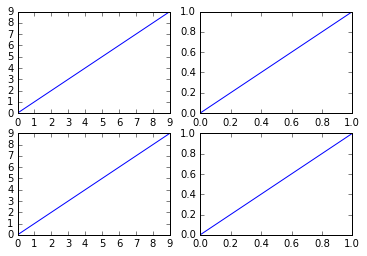

In [88]:
a = np.arange(10)
b = np.arange(2)
plt.figure()
plt.subplot(221)
plt.plot(a)
plt.subplot(222)
plt.plot(b)
plt.subplot(223)
plt.plot(a)
plt.subplot(224)
plt.plot(b)